## Implementation of KNN Regressor function

Background: A	KNN	regressor	is	similar	to	a	KNN	classifier	(covered	in	Activity 1.1) in	that	it	finds	the	K	nearest	neighbors	and	estimates	the	value of	the	given test point based on the values of its neighbours. The main difference between	KNN regression and KNN classification is that KNN classifier returns the label	
that has	the	majority	vote	in	the	neighborhood,	whilst	KNN	regressor	returns	the	average	of	the	neighbors’	values. In	Activity	1	of	Module	1,	we	use	the	number	of	mis-classifications as the measurement of training and testing errors in KNN classifier.	For	KNN	regressor,	you	need	to	choose	another	error	function	(e.g.,	the	sum of the squares of the errors) as the measurement of training errors and	testing	errors.	

### 1. Import all the necessary library and explore the dataset 

In [1]:
#Install all the necessary library
#install.packages("reshape2")
#install.packages("ggplot2")
#install.packages("corrplot")

#Import the library
library(reshape2) #For reshape the file
library(ggplot2) #For data visualisation

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
#Import the training and testing csv file
train <- read.csv('Task1A_train.csv')
test <- read.csv('Task1A_test.csv')

#Explore the train and test dataset
head(train)
head(test)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In [3]:
#Prepare the dataset by separate the actual result and the predictor
train_data = as.matrix(train[,-2]) 
train_label = as.matrix(train[,2])
test_data = as.matrix(test[,-2])
test_label = as.matrix(test[,2])

#All the train set x value after the y have been removed
head(train_data)

1960.0
1960.5
1961.0
1961.5
1962.0
1962.5


### 2. Create KNN regressor function

1. Implement the	KNN	regressor	function:knn(train.data,	train.label,	test.data,	K=3)
which	takes	the	training	data	and	their	labels	(continuous	values),	the	test
set,	and	 the	size	of	 the	neighborhood	 (K).	 It	should	return	 the	regressed
values	 for	 the	 test	 data	 points.	 Note	 that,	 you	 need	 to	 use	 a	 distance
function	to	choose	the	neighbors.	The	distance	 function	used	to	measure
the	distance	between	a	pair	of	data	points	is	Euclidean	distance	function. 

In this part, the KNN regressor function will be created with the same approach of KNN classifier. The only difference is that the knn regressor will return the mean value of the datapoint that near yhe k-neighbour value. This is how the function created:
- It starts with choosing a K value
- Calculate the distance between data point with K with euclidean distance approach
- Then getting an average of distance between point and k-value 
- return the mean from the neighbour point as a prediction

In [4]:
#Derieved the KNN function from the tutorial activity 1
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train and test samples
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    test.label <- as.matrix(nrow(test.data))
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sample...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate mean from the neighbour
        test.label[i] <- mean(train.label[nn])
    }
    
    ## return the mean as output
    return (test.label)
}

In [5]:
#Test whether the function is work
knn(train_data, train_label, test_data)

[1]  0.7233333  0.7233333  0.7933333  0.7500000  0.8533333  0.8233333
 [7]  0.9166667  0.9166667  1.0533333  1.1066667  1.2833333  1.2900000
[13]  1.5233333  1.5500000  1.7400000  1.6300000  1.9000000  2.0100000
[19]  2.4000000  2.5500000  3.0600000  3.3600000  3.8700000  4.2600000
[25]  4.7400000  5.1600000  5.7300000  6.0600000  6.5100000  6.6300000
[31]  7.2300000  7.5000000  7.9500000  8.5200000  9.1200000 10.3200000
[37] 11.1900000 12.6900000 13.6800000 15.0300000 15.6900000 15.6900000

In [6]:
#Error function for the regression it will be mean-square error which is a mean of sum of square or mse
#formula sum of (y_real-y_pred)**/all of sample
mse <- function(a,b){
    mse = sum((a - b)^2/ nrow(b))
    return(mse)
}

### Plot training and testing error

Plot the	training and	the	testing	errors	versus	1/K for	K=1,..,20 in one	plot, using	 the Task1A_train.csv and	Task1A_test.csv datasets provided for this assignment. Save	the	plot in	your Jupyter Notebook	 file	 for
Question	1. Report	your	chosen	error	 function	in	your	 Jupyter	Notebook
file.

Firstly, it will be started by creating a dataframe consist of k 1:20, and using the function mse to calculate the error from both training_set and testing_set after applied a knn regressor function.

In [7]:
#Create dataframe for stroing the training and testing dataset after mse is calculate from the prediction of knn regressor
error <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    error[k,'train'] <- mse(knn(train_data, train_label, train_data, K=k),train_label)
    error[k,'test'] <-  mse(knn(train_data, train_label, test_data, K=k),test_label)
}

Once the error is calculated and stored in the dataframe, it will be used for creating a plot in order to compare the differences between training&testing mse as shown below:

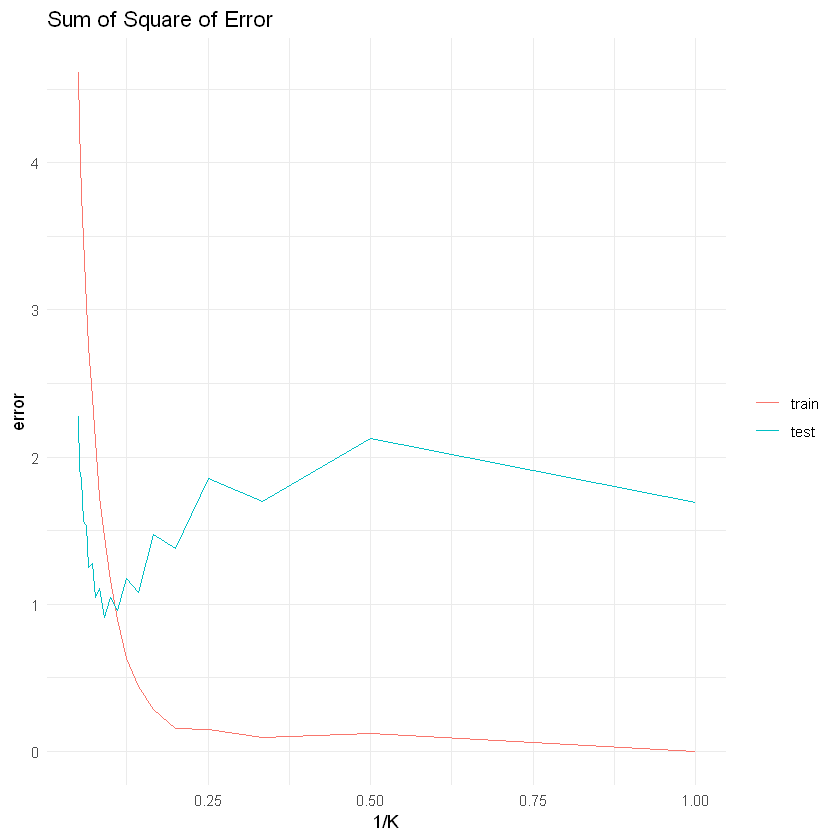

In [8]:
#Plot the training and testing error
error.reshape <- melt(error, id='K') # reshape for visualization, into a long format
names(error.reshape) <- c('K', 'type', 'error') #rename the column for convenience in a plot

#Error plot
ggplot(data=error.reshape, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Sum of Square of Error")

Report	(in	your	 Jupyter	Notebook	 file)	the	optimum	value	 for	K	in	terms of the	testing	error. Discuss the	values	of	K	corresponding	to	underfitting and overfitting based	on	your	plot	in the	previous	part	(Part	II).

In [9]:
#Find the optimal K value for the model by identifying the minimal value of test_error
Min_error<-min(error.reshape[error.reshape$type=="test","error"])
Optimal_K <- error.reshape[error.reshape$type=="test" & error.reshape$error == Min_error,"K"]
Optimal_K

[1] 11

Based on the result, it seems that when the value of K is setting to 11 the model will perform with the least error for the testing set. Also, the plot illustrates that when the K value is less than 11 it will be over-fitting (the model is too complex with k<11). On the other hand, if the K value is more than 11 it will be under-fitting (the model is not complex enough when k>11).  

## Reference

All of the code and the algorithm idea is derieved from:

- Jupyter Notebooks:FIT5201 Machine Learning, (nd.). $\textit{Activity 1.1 K-nearest neighbour classifier}$. https://lms.monash.edu/mod/resource/view.php?id=10048617